In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [2]:
# Collected last 10 year of stock data..
start = '2013-01-01'
end = '2023-12-31'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017
2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567
2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331
2013-01-07,18.317591,18.415474,18.196297,18.300158,18.300158,66476239
2013-01-08,18.319834,18.338762,18.043119,18.264042,18.264042,67295297
...,...,...,...,...,...,...
2023-12-22,142.130005,143.250000,142.054993,142.720001,142.720001,18494700
2023-12-26,142.979996,143.945007,142.500000,142.820007,142.820007,11170100
2023-12-27,142.830002,143.320007,141.050995,141.440002,141.440002,17288400


In [4]:
ma_100_days = data.Close.rolling(100).mean()

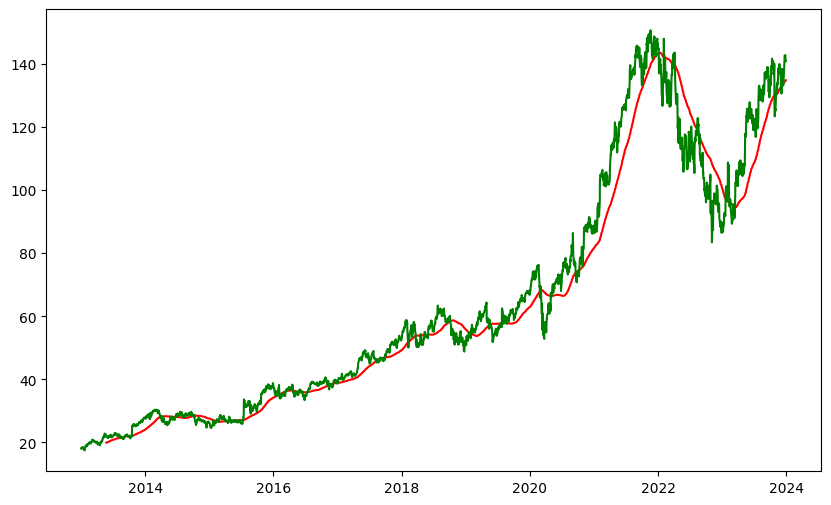

In [5]:
plt.figure(figsize=(10,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [6]:
ma_200_days = data.Close.rolling(200).mean()

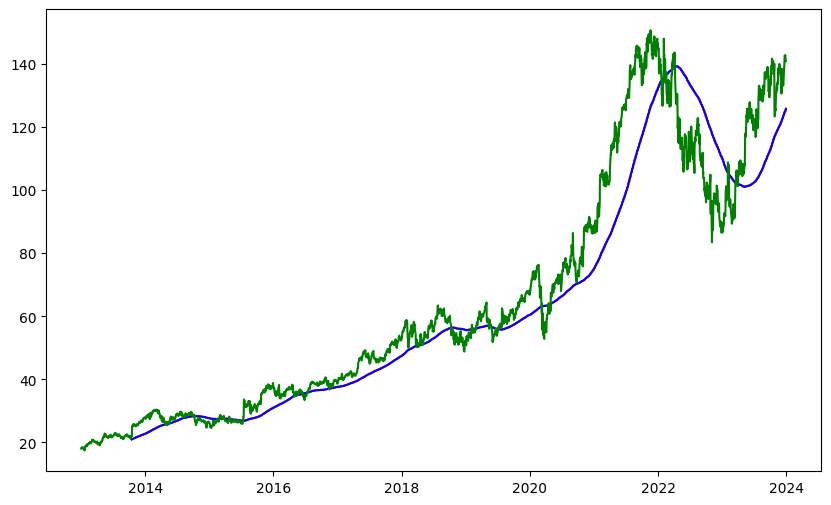

In [7]:
plt.figure(figsize=(10,6))
plt.plot(ma_200_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
data.dropna(inplace=True)

In [9]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [10]:
data_train.shape[0]

2214

In [11]:
 data_test.shape[0]

554

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
data_train_scale = scaler.fit_transform(data_train)

In [14]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])


In [15]:
!pip install keras

In [16]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [17]:
!pip install cartopy
import cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 54.2 MB/s eta 0:00:00


In [18]:
x, y  = np.array(x), np.array(y)

In [19]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape =((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))




In [21]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
model.fit(x,y, epochs =50, batch_size=32, verbose = 1)

Epoch 1/50
67/67 [==============================] - 25s 299ms/step - loss: 0.0193
Epoch 2/50
67/67 [==============================] - 18s 275ms/step - loss: 0.0047
Epoch 3/50
67/67 [==============================] - 20s 296ms/step - loss: 0.0039
Epoch 4/50
67/67 [==============================] - 20s 301ms/step - loss: 0.0036
Epoch 5/50
67/67 [==============================] - 18s 276ms/step - loss: 0.0031
Epoch 6/50
67/67 [==============================] - 20s 299ms/step - loss: 0.0032
Epoch 7/50
67/67 [==============================] - 18s 275ms/step - loss: 0.0030
Epoch 8/50
67/67 [==============================] - 20s 296ms/step - loss: 0.0028
Epoch 9/50
67/67 [==============================] - 19s 279ms/step - loss: 0.0028
Epoch 10/50
67/67 [==============================] - 18s 275ms/step - loss: 0.0026
Epoch 11/50
67/67 [==============================] - 20s 302ms/step - loss: 0.0026
Epoch 12/50
67/67 [==============================] - 18s 275ms/step - loss: 0.0023
Epoch 13/50
6

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
past_100_days = data_train.tail(100)

In [25]:
data_test = pd.concat([past_100_days, data_test], ignore_index=True)

In [26]:
data_test_scale = scaler.fit_transform(data_test)

In [27]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])

x, y = np.array(x), np.array(y)

In [28]:
y_predict = model.predict(x)

18/18 [==============================] - 2s 78ms/step


In [29]:
scale = 1/scaler.scale_

In [30]:
y_predict = y_predict*scale

In [31]:
y = y*scale

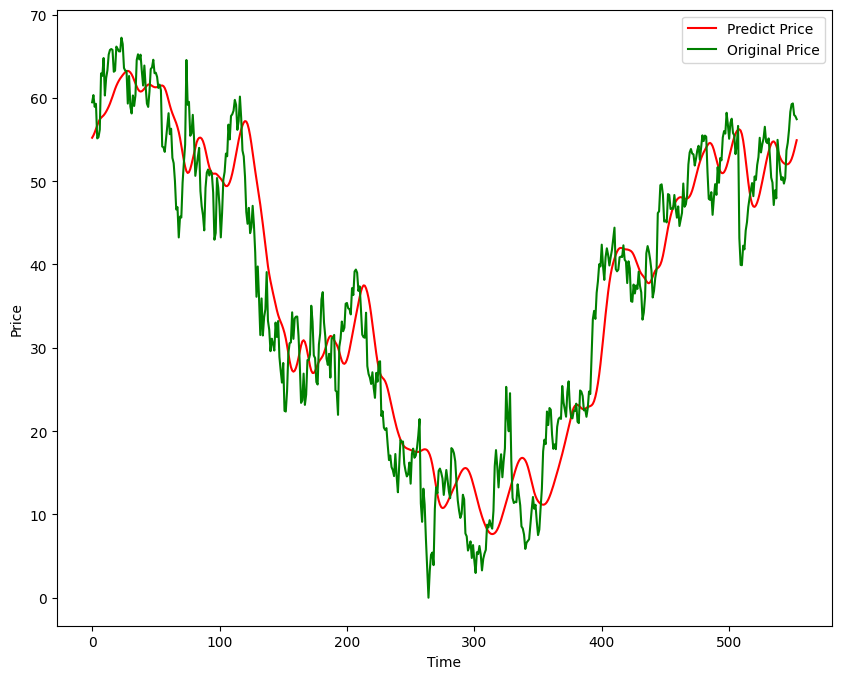

In [32]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label= 'Predict Price')
plt.plot(y, 'g', label= "Original Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [33]:
model.save('Stock Predictions Model.keras')